In [1]:
pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [3]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# data_dir='/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/'
# print(data_dir)
data_dir='C:/Users/jerwin/Documents/butterfly_photos/butterfly'
print(data_dir)

C:/Users/jerwin/Documents/butterfly_photos/butterfly


In [6]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 551 files belonging to 18 classes.


In [7]:
count = 0
dirs = os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/')
for dir in dirs:
    files = list(os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/')

Butterfly-Clippers Folder has 30C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Common Jay Folder has 30C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Common Lime Folder has 80C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Common Mime Folder has 44C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Common Mormon Folder has 30C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Emerald Swallowtail Folder has 28C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Golden Birdwing Folder has 118C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Gray Glassy Tiger Folder has 32C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Great Eggfly Folder has 35C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Great Yellow Mormon Folder has 54C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/
Butterfly-Pape

In [8]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/'
img_size = 180
batch = 32

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 993 files belonging to 18 classes.
Using 795 files for training.
Found 993 files belonging to 18 classes.
Using 198 files for validation.


In [10]:
butterfly_species_names = train_ds.class_names
butterfly_species_names

['Butterfly-Clippers',
 'Butterfly-Common Jay',
 'Butterfly-Common Lime',
 'Butterfly-Common Mime',
 'Butterfly-Common Mormon',
 'Butterfly-Emerald Swallowtail',
 'Butterfly-Golden Birdwing',
 'Butterfly-Gray Glassy Tiger',
 'Butterfly-Great Eggfly',
 'Butterfly-Great Yellow Mormon',
 'Butterfly-Paper Kite',
 'Butterfly-Pink Rose',
 'Butterfly-Plain Tiger',
 'Butterfly-Red Lacewing',
 'Butterfly-Scarlet Mormon',
 'Butterfly-Tailed Jay',
 'Moth-Atlas',
 'Moth-Giant Silk']

In [11]:
import matplotlib.pyplot as plt

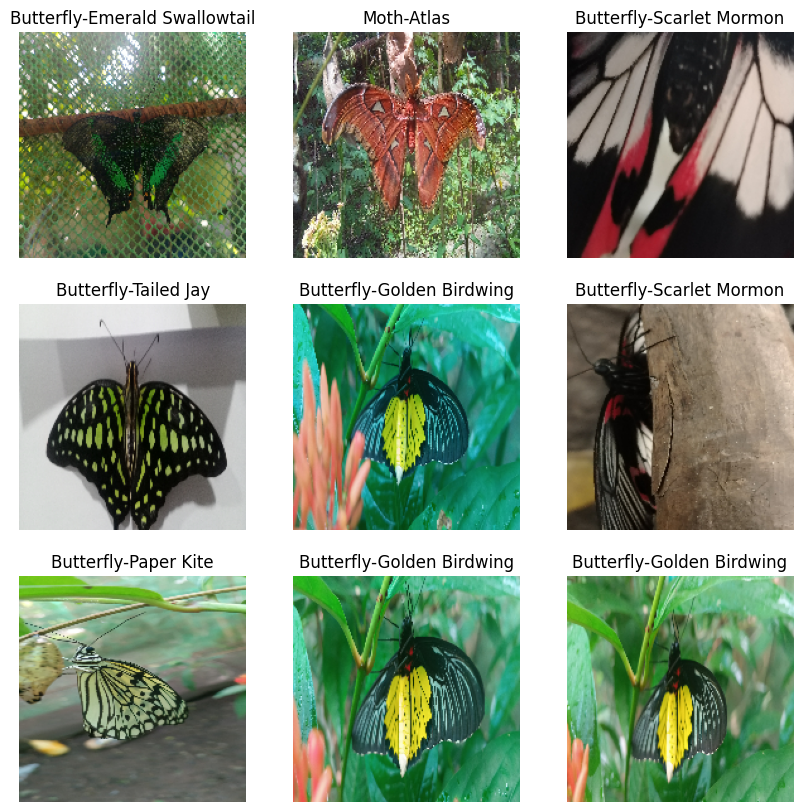

In [12]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(butterfly_species_names[labels[i]])
        plt.axis('off')

In [13]:
#index number and butterfly_species_names
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     label_with_number = f"{batch[1][idx]} - {butterfly_species_names[batch[1][idx]]}"  # Concatenate number and label
#     ax[idx].title.set_text(label_with_number)  # Set title with both


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [16]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

##Data AUgmentation

In [17]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

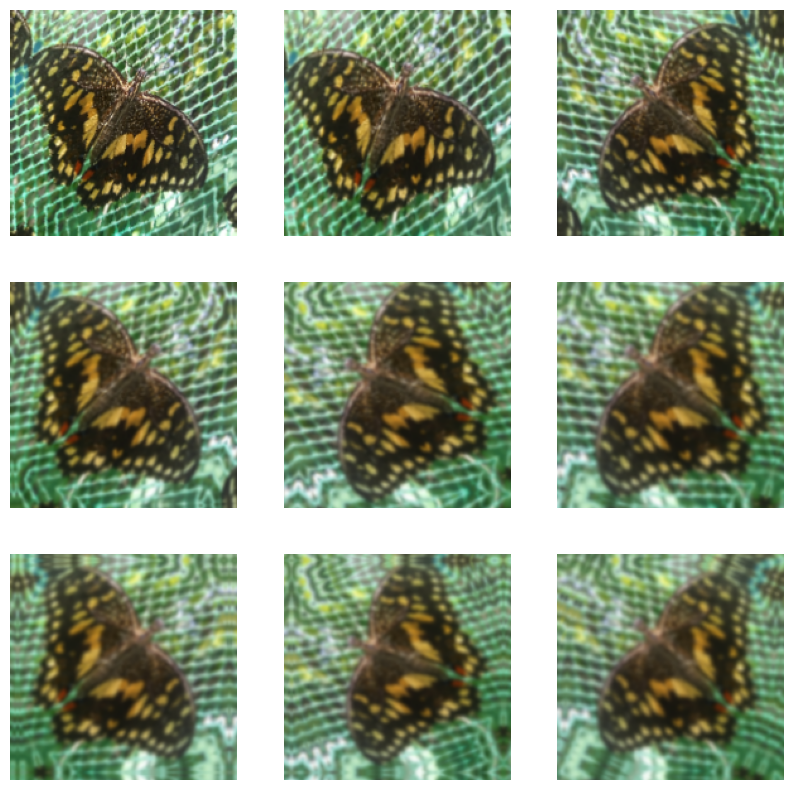

In [18]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

##Model Creation

In [19]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(18)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [22]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


25/25 [==============================] - 13s 461ms/step - loss: 2.8577 - accuracy: 0.1283 - val_loss: 2.6580 - val_accuracy: 0.1768
Epoch 2/15
25/25 [==============================] - 5s 190ms/step - loss: 2.3393 - accuracy: 0.3094 - val_loss: 2.1025 - val_accuracy: 0.3586
Epoch 3/15
25/25 [==============================] - 5s 190ms/step - loss: 1.9936 - accuracy: 0.3874 - val_loss: 2.0012 - val_accuracy: 0.4242
Epoch 4/15
25/25 [==============================] - 5s 196ms/step - loss: 1.5937 - accuracy: 0.5333 - val_loss: 1.4138 - val_accuracy: 0.6263
Epoch 5/15
25/25 [==============================] - 6s 232ms/step - loss: 1.2610 - accuracy: 0.6528 - val_loss: 1.1000 - val_accuracy: 0.6768
Epoch 6/15
25/25 [==============================] - 6s 241ms/step - loss: 0.9541 - accuracy: 0.7233 - val_loss: 0.9710 - val_accuracy: 0.7525
Epoch 7/15
25/25 [==============================] - 6s 259ms/step - loss: 0.7727 - accuracy: 0.7950 - val_loss: 0.9869 - val_accuracy: 0.7323
Epo

In [23]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + butterfly_species_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [24]:
classify_images('C:/Users/jerwin/Documents/GitHub/butterfly_photos/butterfly/Butterfly-Emerald Swallowtail/Emerald Swallowtail 8.jpg')

1/1 [==============================] - 2s 2s/step


'The Image belongs to Butterfly-Emerald Swallowtail with a score of 99.32621121406555'

In [25]:
model.save('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Butterfly_Species.keras')

In [26]:
model.save('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Butterfly_Species.h5')

c:\Users\jerwin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Check the loaded model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [28]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/PrettyLep/json/model_Butterfly_Species.json", "w") as json_file:
    json_file.write(model_json)


In [29]:
from tensorflow.keras.models import load_model


In [30]:
model = load_model('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Butterfly_Species.h5')

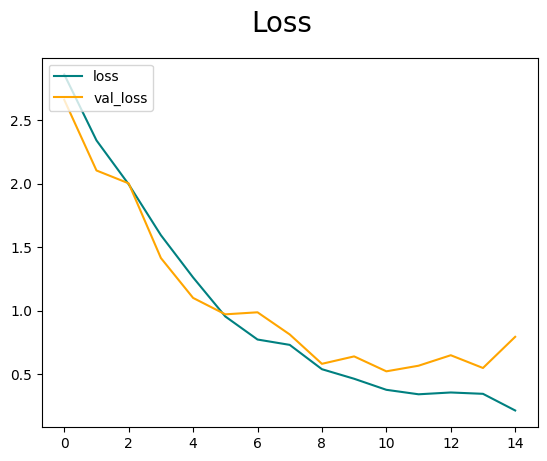

In [31]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

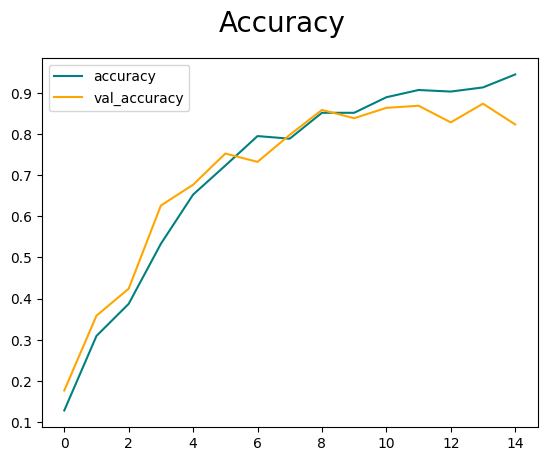

In [32]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

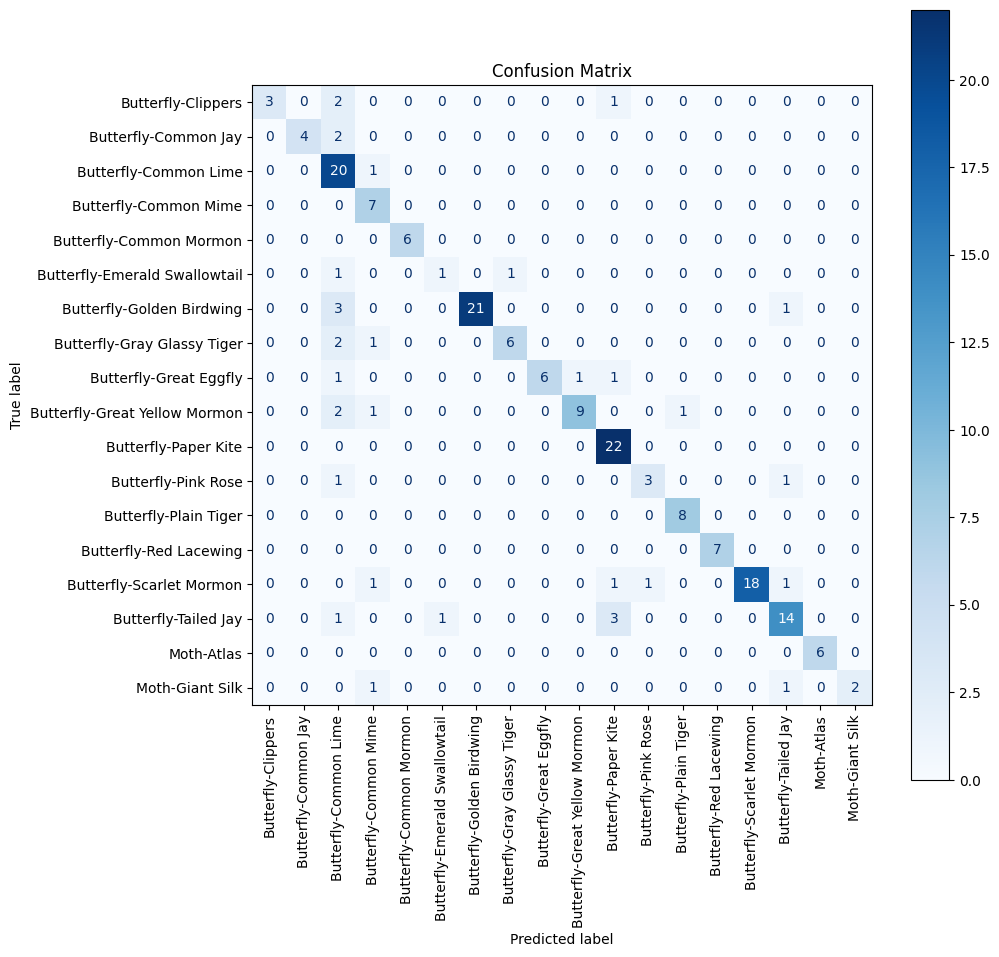

F1 Score (macro): 0.7986
F1 Score (weighted): 0.8241


In [33]:
# ...existing code...

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Evaluate model and plot confusion matrix + F1 score
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    img_array = tf.expand_dims(images, 0)  # Add batch dimension
    preds = model.predict(img_array, verbose=0)
    pred_label = np.argmax(preds, axis=1)[0]
    y_true.append(labels.numpy())
    y_pred.append(pred_label)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=butterfly_species_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

# F1 Score (macro and weighted)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")
# ...existing code...